In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obfuscated-malware-memory-2022-cic/Obfuscated-MalMem2022.csv


In [35]:
df = pd.read_csv("/kaggle/input/obfuscated-malware-memory-2022-cic/Obfuscated-MalMem2022.csv")

In [36]:
df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [37]:
df.shape

(58596, 57)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [39]:
df.isnull().sum()

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

In [40]:
df["Category"].value_counts()

Benign                                                                                     29298
Spyware-Gator-1bdcd3b777965f67678748d2577b119a275aca9aed9549d45e64e692a54a7b5e-1.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-2.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-10.raw          2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-1.raw           2
                                                                                           ...  
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-6.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-5.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-4.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-3.raw           1
Ransomware-Shade-955d9af38346c

In [41]:
def find_category(column):
    if "-" in column:
        category = column.split("-")[0]
        return category
    else:
        return column

In [42]:
def find_category_name(column):
    if "-" in column:
        category_name = column.split("-")[1]
        return category_name
    else:
        return column

In [43]:
df["category"] = df["Category"].apply(find_category)

In [44]:
df["category"].value_counts()

Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: category, dtype: int64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='category', ylabel='count'>

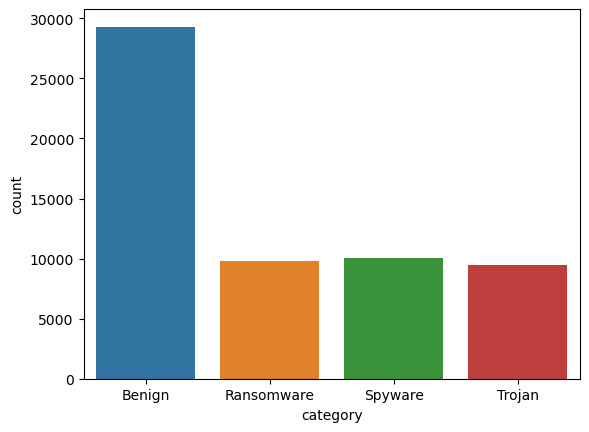

In [46]:
sns.countplot(x=df["category"])

<Axes: ylabel='category'>

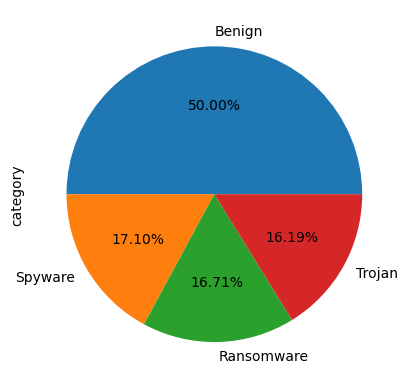

In [47]:
df["category"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [48]:
df["category_name"] = df["Category"].apply(find_category_name)

In [49]:
df["category_name"].value_counts()

Benign          29298
Transponder      2410
Gator            2200
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Conti            1988
Emotet           1967
Maze             1958
Zeus             1950
Pysa             1717
Reconyc          1570
TIBS             1410
Name: category_name, dtype: int64

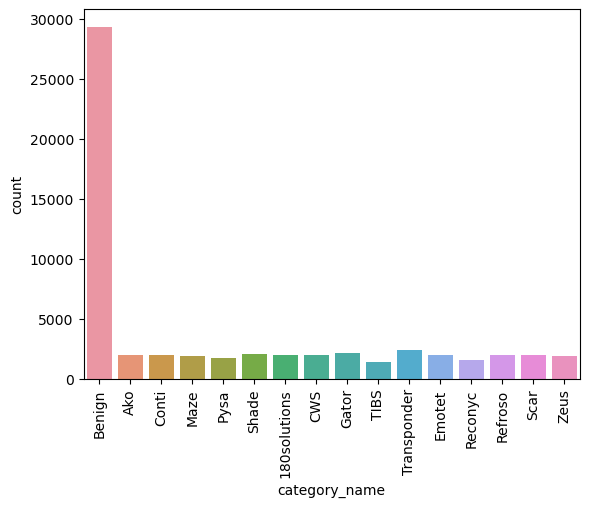

In [25]:
plt.figure()
sns.countplot(x=df["category_name"])
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='category_name'>

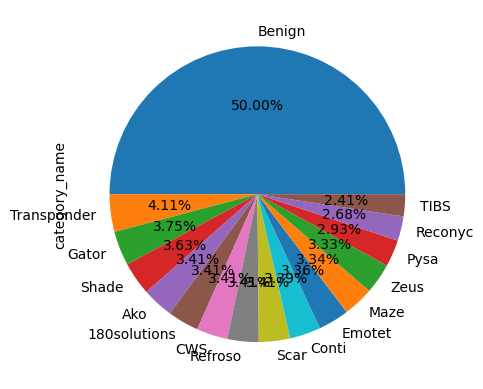

In [26]:
df["category_name"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [50]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [51]:
df["category"] = label_encoder(df["category"])
df["category_name"] = label_encoder(df["category_name"])
df["class"] = label_encoder(df["Class"])

category ['Benign' 'Ransomware' 'Spyware' 'Trojan']
category_name ['180solutions' 'Ako' 'Benign' 'CWS' 'Conti' 'Emotet' 'Gator' 'Maze'
 'Pysa' 'Reconyc' 'Refroso' 'Scar' 'Shade' 'TIBS' 'Transponder' 'Zeus']
Class ['Benign' 'Malware']


In [52]:
df.drop(["Category", "Class"], axis=1, inplace=True)

In [53]:
df.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,category,category_name,class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,24,116,0,121,87,0,8,0,2,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,24,118,0,122,87,0,8,0,2,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,27,118,0,120,88,0,8,0,2,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,27,118,0,120,88,0,8,0,2,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,24,118,0,124,87,0,8,0,2,0


In [54]:
X = df.drop("class", axis=1)
y = df["class"]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   pslist.nproc                            58596 non-null  int64  
 1   pslist.nppid                            58596 non-null  int64  
 2   pslist.avg_threads                      58596 non-null  float64
 3   pslist.nprocs64bit                      58596 non-null  int64  
 4   pslist.avg_handlers                     58596 non-null  float64
 5   dlllist.ndlls                           58596 non-null  int64  
 6   dlllist.avg_dlls_per_proc               58596 non-null  float64
 7   handles.nhandles                        58596 non-null  int64  
 8   handles.avg_handles_per_proc            58596 non-null  float64
 9   handles.nport                           58596 non-null  int64  
 10  handles.nfile                           58596 non-null  in

In [57]:
# Define the partitioning
# First 28 features for Party 1, next 28 features for Party 2
party1_features = df.columns[:28]  # First half of features
party2_features = df.columns[28:-1]  # Second half of features
target_column = 'class'  # Target column

In [58]:
# Create subsets for each party
party1_data = df[party1_features]
party2_data = df[party2_features]
labels = df[target_column]

In [59]:
# Print to verify
print("Party 1 Data:")
print(party1_data.head())
print("\nParty 2 Data:")
print(party2_data.head())
print("\nLabels:")
print(labels.head())

Party 1 Data:
   pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
0            45            17           10.555556                   0   
1            47            19           11.531915                   0   
2            40            14           14.725000                   0   
3            32            13           13.500000                   0   
4            42            16           11.452381                   0   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0           202.844444           1694                  38.500000   
1           242.234043           2074                  44.127660   
2           288.225000           1932                  48.300000   
3           264.281250           1445                  45.156250   
4           281.333333           2067                  49.214286   

   handles.nhandles  handles.avg_handles_per_proc  handles.nport  ...  \
0              9129                    212.302326              0 

In [61]:
from sklearn.model_selection import train_test_split
# Train-test split
train_idx, test_idx = train_test_split(np.arange(len(labels)), test_size=0.2, random_state=42)
party1_train, party1_test = party1_data.iloc[train_idx], party1_data.iloc[test_idx]
party2_train, party2_test = party2_data.iloc[train_idx], party2_data.iloc[test_idx]
y_train, y_test = labels.iloc[train_idx], labels.iloc[test_idx]

In [68]:
from sklearn.tree import DecisionTreeClassifier
# Federated Learning Simulation
# Each party computes local outputs and shares with a trusted aggregator
class VerticalFederatedLearning:
    def __init__(self):
        self.party1_model = DecisionTreeClassifier(max_depth=5, random_state=42)
        self.party2_model = DecisionTreeClassifier(max_depth=5, random_state=42)

    def train(self, party1_data, party2_data, y):
        # Train each party's model independently
        self.party1_model.fit(party1_data, y)
        self.party2_model.fit(party2_data, y)

    def predict(self, party1_data, party2_data):
        # Generate predictions from each party
        pred1 = self.party1_model.predict_proba(party1_data)[:, 1]
        pred2 = self.party2_model.predict_proba(party2_data)[:, 1]

        # Aggregate predictions (e.g., averaging)
        combined_pred = (pred1 + pred2) / 2
        return (combined_pred > 0.5).astype(int)

In [66]:
from sklearn.ensemble import RandomForestClassifier
# Federated Learning Simulation
# Each party computes local outputs and shares with a trusted aggregator
class VerticalFederatedLearningRF:
    def __init__(self):
        self.party1_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
        self.party2_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

    def train(self, party1_data, party2_data, y):
        # Train each party's model independently
        self.party1_model.fit(party1_data, y)
        self.party2_model.fit(party2_data, y)

    def predict(self, party1_data, party2_data):
        # Generate predictions from each party
        pred1 = self.party1_model.predict_proba(party1_data)[:, 1]
        pred2 = self.party2_model.predict_proba(party2_data)[:, 1]

        # Aggregate predictions (e.g., averaging)
        combined_pred = (pred1 + pred2) / 2
        return (combined_pred > 0.5).astype(int)

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Initialize and train the VFL system
vfl = VerticalFederatedLearningRF()
vfl.train(party1_train, party2_train, y_train)

# Test the model
y_pred = vfl.predict(party1_test, party2_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

Accuracy: 99.94%
Precision: 99.97%
Recall: 99.92%
F1-Score: 99.94%


In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Initialize and train the VFL system
vfl = VerticalFederatedLearning()
vfl.train(party1_train, party2_train, y_train)

# Test the model
y_pred = vfl.predict(party1_test, party2_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

Accuracy: 99.99%
Precision: 100.00%
Recall: 99.98%
F1-Score: 99.99%
